In [1]:
from BPM import BPM_extractor

import  matplotlib.pyplot as plt 
from pydub import AudioSegment
import numpy as np 
import librosa

In [2]:

class sound_C(): 
    def __init__(self, path):
        sound = AudioSegment.from_file(path)
        self.fs = sound.frame_rate
        if sound.channels == 2:
            sound = sound.set_channels(1)
        # normalize: 
        audio = np.array(sound.get_array_of_samples())
        audio = audio / np.max(np.abs(audio))
        self.sound = audio
        
    def shorten(self, start = 0.0, end = 1.1): # in secs
        self.sound = self.sound[int(start* self.fs):int(end*self.fs)]
    
    def give_short(self, start = 0.0, end = 1.1):
        return self.sound[int(start* self.fs):int(end*self.fs)]

    def __len__(self):
        return len(self.sound)
    
s1 = sound_C("../data/Jez_ebel - ADHD copy.mp3")


In [3]:
spectral = BPM_extractor(s1.fs, novelty="spectral")
energy = BPM_extractor(s1.fs, novelty="energy")

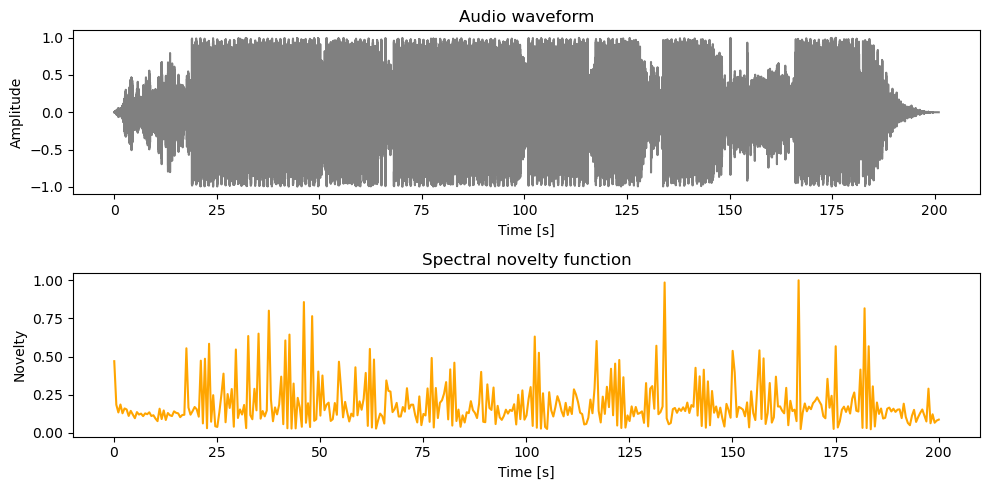

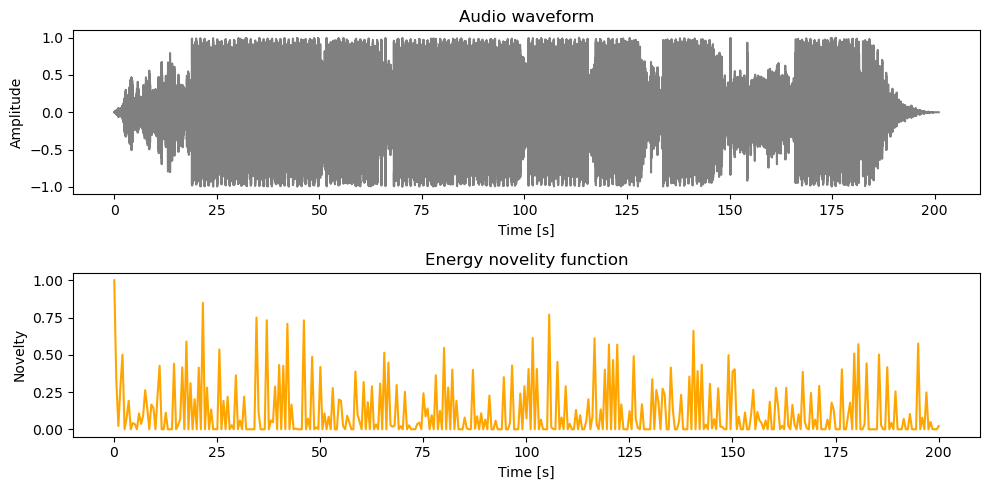

In [ ]:
spectral.plot_novelty(s1.sound)
energy.plot_novelty(s1.sound)